# Atlanta Braves Analysis 

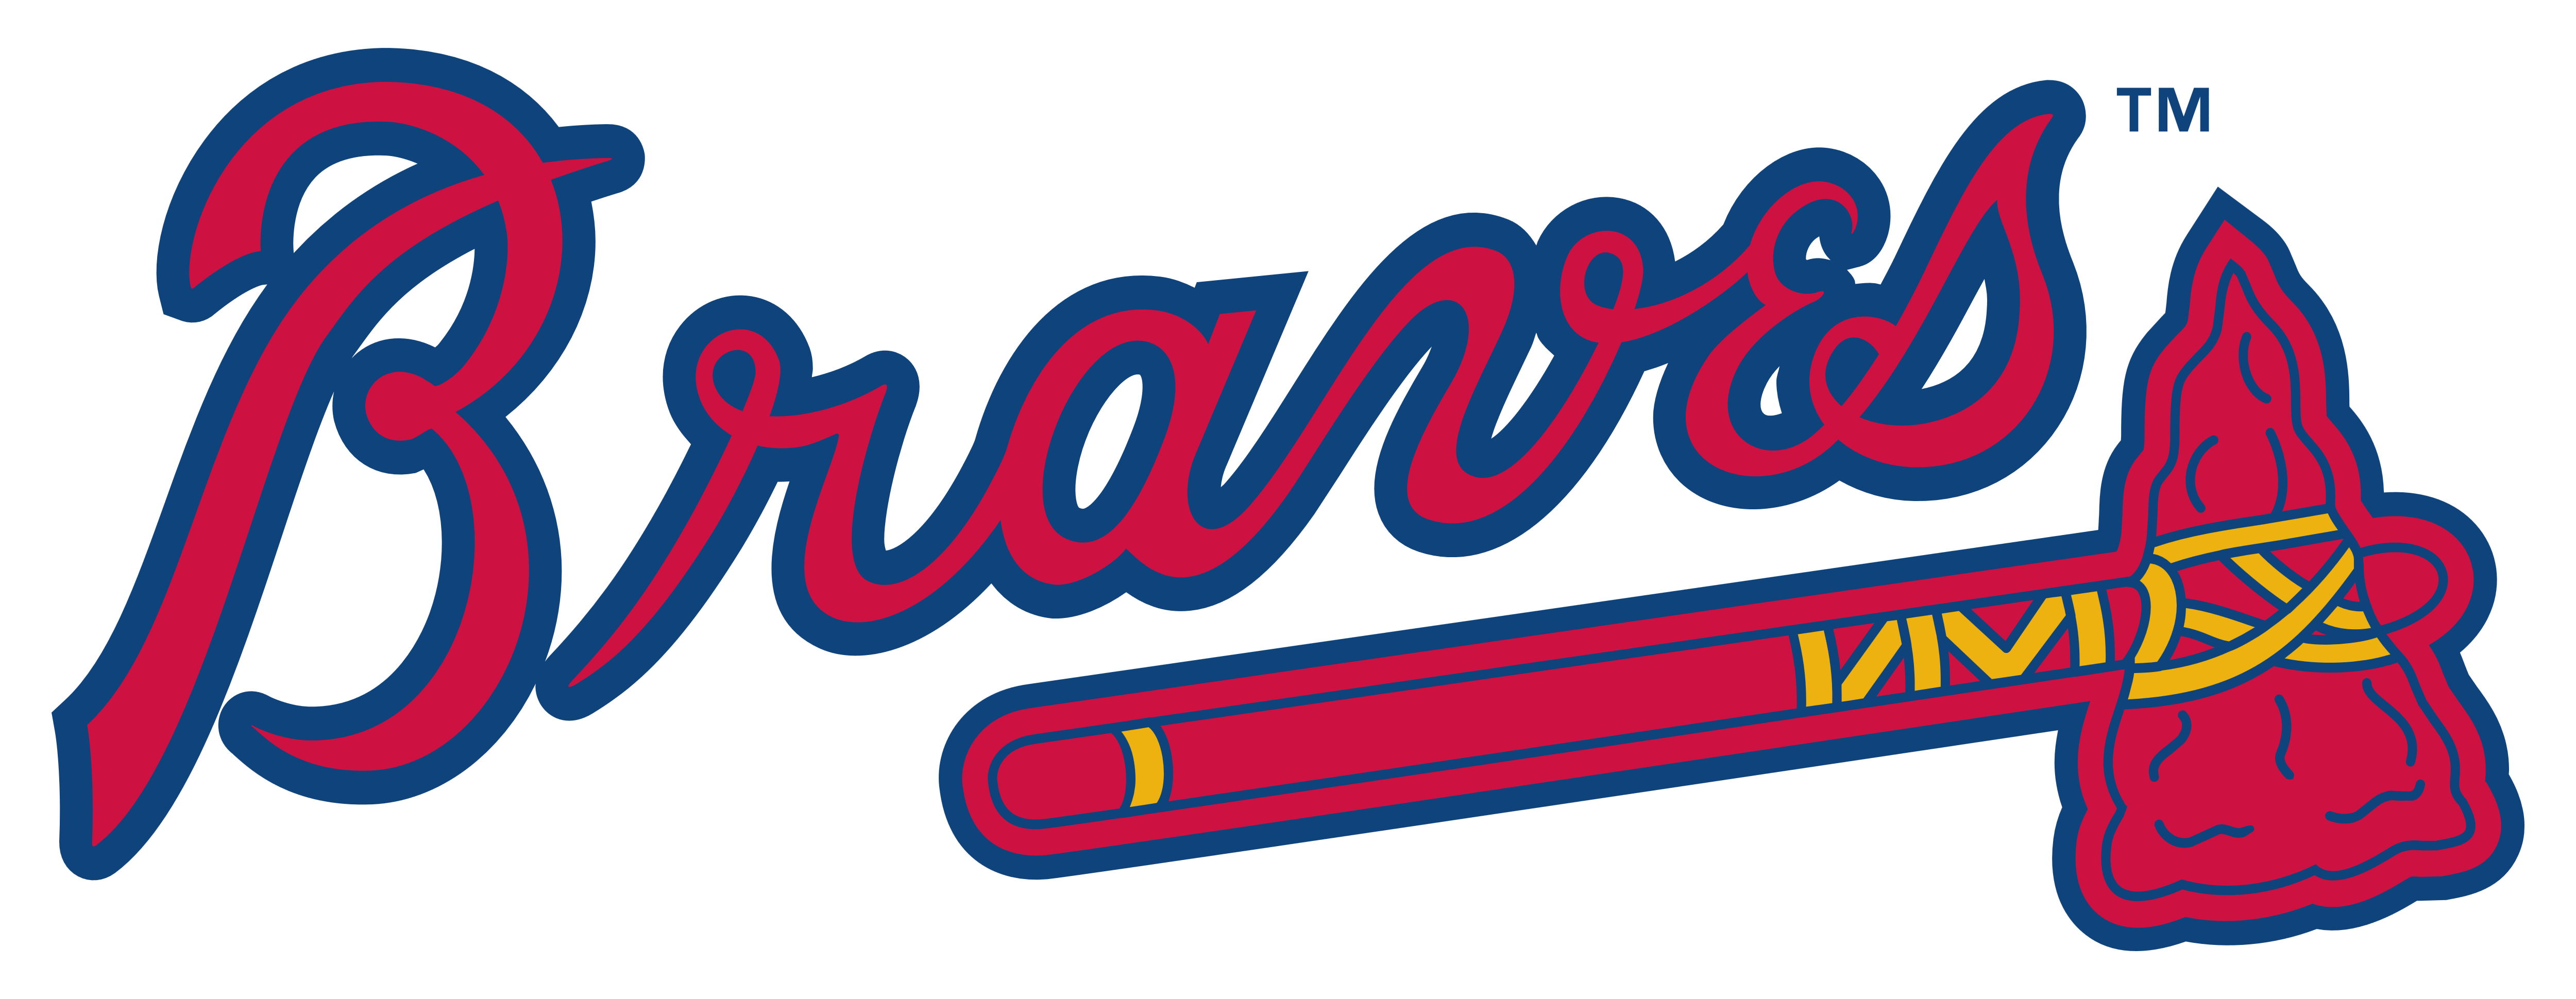

### Rachel Ledoux

### Dataset source:https://openintro.org/data/index.php?data=mlb_teams
### In this project, I will use Python to analyze and visualize baseball data. Various Python packages will be imported to accomplish this task.

In [2]:
import numpy as np
import pandas as pd
from scipy import sparse
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [3]:
import pandas as pd
import xlrd

# assigning the dataframe as baseballdata

baseballdata = pd.read_excel("MLB Stats-Atlanta Braves.xlsx")
baseballdata.head()

,year,league_id,division_id,rank,games_played,home_games,wins,losses,division_winner,wild_card_winner,...,hits_allowed,homeruns_allowed,walks_allowed,strikeouts_by_pitchers,errors,double_plays,fielding_percentage,team_name,ball_park,home_attendance
0,1876,NL,NaN,4,70,NaN,39,31,NaN,NaN,...,732,7,104,77,442,42,0.860,Boston Red Caps,South End Grounds I,NaN
1,1876,NL,NaN,1,66,NaN,52,14,NaN,NaN,...,608,6,29,51,282,33,0.899,Chicago White Stockings,23rd Street Grounds,NaN
2,1876,NL,NaN,8,65,NaN,9,56,NaN,NaN,...,850,9,34,60,469,45,0.841,Cincinnati Reds,Avenue Grounds,NaN
3,1876,NL,NaN,2,69,NaN,47,21,NaN,NaN,...,570,2,27,114,337,27,0.888,Hartford Dark Blues,Hartford Ball Club Grounds,NaN
4,1876,NL,NaN,5,69,NaN,30,36,NaN,NaN,...,605,3,38,125,397,44,0.875,Louisville Grays,Louisville Baseball Park,NaN


In [4]:
# creating a copy of the baseballdata prior to data manipulation and analysis

baseballdata2 = baseballdata.copy()                               # Create copy of DataFrame
baseballdata2.head()  

,year,league_id,division_id,rank,games_played,home_games,wins,losses,division_winner,wild_card_winner,...,hits_allowed,homeruns_allowed,walks_allowed,strikeouts_by_pitchers,errors,double_plays,fielding_percentage,team_name,ball_park,home_attendance
0,1876,NL,NaN,4,70,NaN,39,31,NaN,NaN,...,732,7,104,77,442,42,0.860,Boston Red Caps,South End Grounds I,NaN
1,1876,NL,NaN,1,66,NaN,52,14,NaN,NaN,...,608,6,29,51,282,33,0.899,Chicago White Stockings,23rd Street Grounds,NaN
2,1876,NL,NaN,8,65,NaN,9,56,NaN,NaN,...,850,9,34,60,469,45,0.841,Cincinnati Reds,Avenue Grounds,NaN
3,1876,NL,NaN,2,69,NaN,47,21,NaN,NaN,...,570,2,27,114,337,27,0.888,Hartford Dark Blues,Hartford Ball Club Grounds,NaN
4,1876,NL,NaN,5,69,NaN,30,36,NaN,NaN,...,605,3,38,125,397,44,0.875,Louisville Grays,Louisville Baseball Park,NaN


In [7]:
# summarizing columns for reference

baseballdata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2784 entries, 0 to 2783
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2784 non-null   int64  
 1   league_id               2784 non-null   object 
 2   division_id             1438 non-null   object 
 3   rank                    2784 non-null   int64  
 4   games_played            2784 non-null   int64  
 5   home_games              2556 non-null   float64
 6   wins                    2784 non-null   int64  
 7   losses                  2784 non-null   int64  
 8   division_winner         1410 non-null   object 
 9   wild_card_winner        774 non-null    object 
 10  league_winner           2756 non-null   object 
 11  world_series_winner     2536 non-null   object 
 12  runs_scored             2784 non-null   int64  
 13  at_bats                 2784 non-null   int64  
 14  hits                    2784 non-null   

In [14]:
# positional indexing with loc() to pull Atlanta Braves data and assigned it to new dataframe
baseballdata3 = baseballdata2['team_name'].values == 'Atlanta Braves'
baseballdata3 = baseballdata2.loc[baseballdata3]
print(baseballdata3)

      year league_id division_id  rank  games_played  home_games  wins  \
1286  1966        NL         NaN     5           163        82.0    85   
1306  1967        NL         NaN     7           162        81.0    77   
1326  1968        NL         NaN     5           163        81.0    81   
1346  1969        NL           W     1           162        81.0    93   
1370  1970        NL           W     5           162        81.0    76   
1394  1971        NL           W     3           162        82.0    82   
1418  1972        NL           W     4           155        78.0    70   
1442  1973        NL           W     5           162        81.0    76   
1466  1974        NL           W     3           163        81.0    88   
1490  1975        NL           W     5           161        80.0    67   
1514  1976        NL           W     6           162        81.0    70   
1538  1977        NL           W     6           162        81.0    61   
1564  1978        NL           W     6

## Analyze and Visualize Data

#### Historical data of the Atlanta Braves

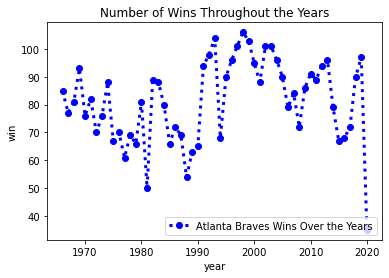

In [23]:
import pandas as pd
import matplotlib.pyplot as plt 

#AtlBrv = baseballdata3 ['wins'].tolist()
winslist = baseballdata3 ['wins'].tolist()
yearslist = baseballdata3 ['year'].tolist()
plt.title('Number of Wins Throughout the Years')
plt.xlabel('year')
plt.ylabel('win')
plt.plot(yearslist , winslist, ':b', marker='o', linewidth=3, label = 'Atlanta Braves Wins Over the Years')
plt.legend(loc = 4)
plt.show()



In [29]:
# Wins recorded througout the years

record_of_wins = baseballdata3.groupby('year')['wins'].value_counts()
record_of_wins

year  wins
1966  85      1
1967  77      1
1968  81      1
1969  93      1
1970  76      1
1971  82      1
1972  70      1
1973  76      1
1974  88      1
1975  67      1
1976  70      1
1977  61      1
1978  69      1
1979  66      1
1980  81      1
1981  50      1
1982  89      1
1983  88      1
1984  80      1
1985  66      1
1986  72      1
1987  69      1
1988  54      1
1989  63      1
1990  65      1
1991  94      1
1992  98      1
1993  104     1
1994  68      1
1995  90      1
1996  96      1
1997  101     1
1998  106     1
1999  103     1
2000  95      1
2001  88      1
2002  101     1
2003  101     1
2004  96      1
2005  90      1
2006  79      1
2007  84      1
2008  72      1
2009  86      1
2010  91      1
2011  89      1
2012  94      1
2013  96      1
2014  79      1
2015  67      1
2016  68      1
2017  72      1
2018  90      1
2019  97      1
2020  35      1
Name: wins, dtype: int64

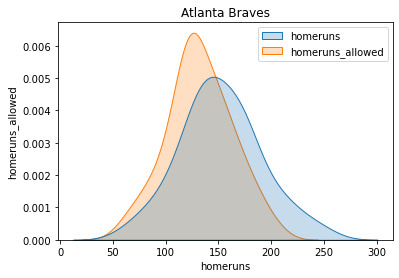

In [37]:
# Kernel Density Estimate plot of homeruns versus homeruns allowed for Atlanta Braves

sub=baseballdata3[baseballdata3['team_name']=='Atlanta Braves']
sns.kdeplot(data=sub[['homeruns','homeruns_allowed']], shade=True, thresh=False)
plt.title('Atlanta Braves')
plt.xlabel('homeruns')
plt.ylabel('homeruns_allowed')
plt.show()

In [41]:
# for each team name, calculating the min and max at_bats

baseballdata2.groupby('team_name').at_bats.agg(['min', 'max'])

,min,max
team_name,,
Anaheim Angels,5487,5678
Arizona Diamondbacks,1997,5676
Atlanta Braves,2074,5689
Baltimore Orioles,2026,5736
Boston Americans,4866,5235
...,...,...
Toronto Blue Jays,2023,5716
Troy Trojans,2841,3057
Washington Nationals,1968,5615


In [42]:
# # for each team name, calculating the min and max hits

baseballdata2.groupby('team_name').hits.agg(['min', 'max'])

,min,max
team_name,,
Anaheim Angels,1404,1603
Arizona Diamondbacks,482,1566
Atlanta Braves,556,1608
Baltimore Orioles,523,1647
Boston Americans,1179,1356
...,...,...
Toronto Blue Jays,516,1591
Troy Trojans,673,755
Washington Nationals,519,1477
